<a href="https://colab.research.google.com/github/Doloreszjx/neural_network_task/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新段落

In [2]:
%cd /content/drive/MyDrive/9414dataset/
!ls

/content/drive/MyDrive/9414dataset
'AirQualityUCI _ Students.xlsx'   history.csv   history_regression.csv


/content/drive/MyDrive/9414dataset
'AirQualityUCI _ Students.xlsx'   history.csv   history_regression.csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               896       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                 

<Figure size 1500x3900 with 0 Axes>

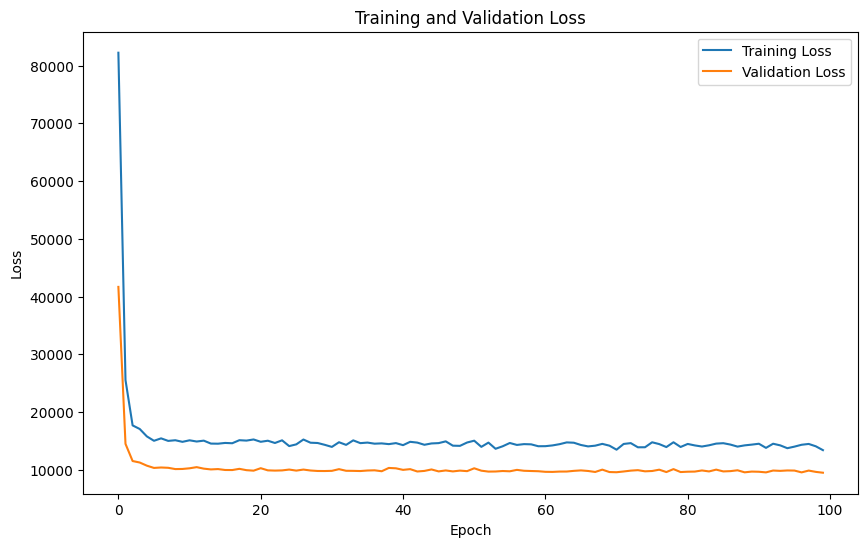

53/53 [==============================] - 0s 2ms/step


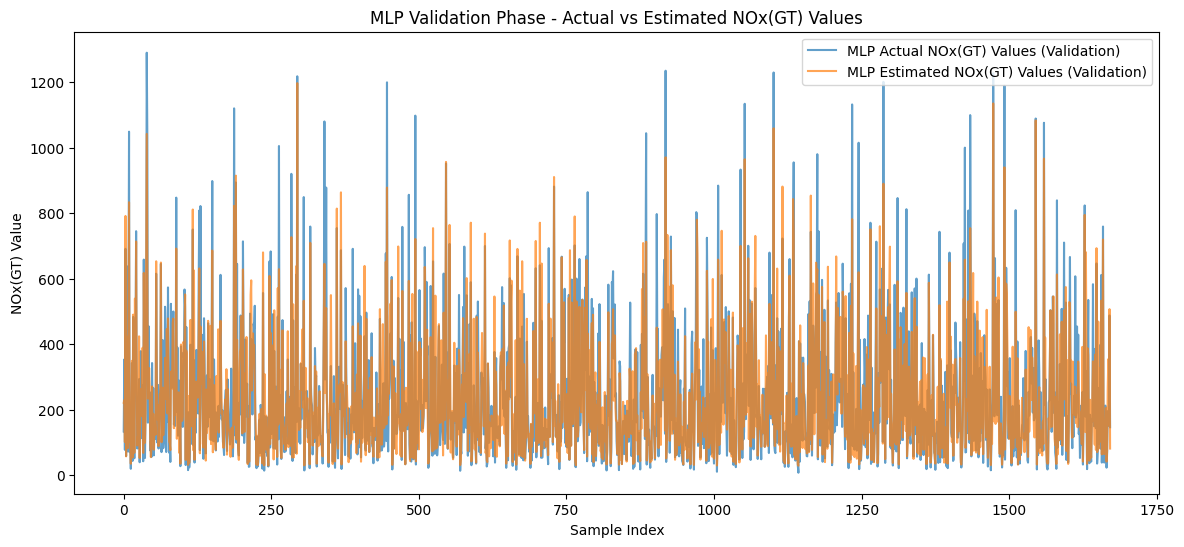

53/53 [==============================] - 0s 2ms/step
RMSE: 97.45160632620048
27/27 [==============================] - 0s 3ms/step
MAE: 68.14990667458437
Number of Samples: 836


In [4]:
%cd /content/drive/MyDrive/9414dataset/
!ls
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive



drive.mount('/content/drive')
file_path = 'AirQualityUCI _ Students.xlsx'
df = pd.read_excel(file_path)
# print(df)

# Identify variation range for input and output variables
variation_range = df.describe()
# print(variation_range)

# process
# make sure the format of date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# # check the format of date
# print("DataFrame head:\n", df.head())
# # check
# print("DataFrame columns:\n", df.columns)

# 设置日期列为索引
df.set_index('Date', inplace=True)
# print(df.index)

# Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
      #  'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
      #  'PT08.S5(O3)', 'T', 'RH', 'AH'],
      # dtype='object')
# from second column
columns_to_plot = df.columns[1:]
# print(df)



# preprocessing
# create plot
plt.figure(figsize=(15, len(columns_to_plot)*3))
# enumerate(columns_to_plot) => [0: 'CO(GT)', 1: 'PT08.S1(CO)', ... ]
# for i, column in enumerate(columns_to_plot):
#     plt.subplot(len(columns_to_plot), 1, i + 1)
#     # set x,y
#     plt.plot(df.index, df[column], label=column)
#     plt.title(f'{column}')
#     plt.xlabel('Date')
#     plt.ylabel(column)
#     plt.legend()
# plt.tight_layout()
# plt.show()

# value-distribution
# plt.figure(figsize=(15, len(columns_to_plot)*3))
# for i, column in enumerate(columns_to_plot):
#     plt.subplot(len(columns_to_plot), 1, i + 1)
#     sns.histplot(df[column], kde=True)
#     plt.title(f'{column}')
#     plt.xlabel('Date')
#     # plt.ylabel(column)
# plt.tight_layout()
# plt.show()

# find missing-values
missing_values = df[columns_to_plot] == -200
missing_values_sum = missing_values.sum()
# print(missing_values)
# print(missing_values_sum)

# create each column's missing
# plt.figure(figsize=(15, 4))
# sns.barplot(x=missing_values_sum.index, y=missing_values_sum.values)
# plt.bar_label(plt.bar(missing_values_sum.index, missing_values_sum.values))
# plt.title('Missing Values')
# plt.xlabel('Columns')
# plt.ylabel('Missing Values')
# plt.show()
df[columns_to_plot] = df[columns_to_plot].replace(-200, np.nan)
# print(df)
missing_values = df[columns_to_plot].isnull()
missing_values_sum = missing_values.sum()
# check replacement is right
# plt.figure(figsize=(15, 4))
# sns.barplot(x=missing_values_sum.index, y=missing_values_sum.values)
# plt.bar_label(plt.bar(missing_values_sum.index, missing_values_sum.values))
# plt.title('Missing Values')
# plt.xlabel('Columns')
# plt.ylabel('Missing Values')
# plt.show()

# interpolation
df_linear_interpolation = df[columns_to_plot].interpolate(method='linear', inplace=False)
# print(df_linear_interpolation)

# for i, column in enumerate(columns_to_plot):
#     plt.subplot(len(columns_to_plot), 1, i + 1)
#     # set x,y
#     plt.plot(df.index, df[column], label=column)
#     plt.title(f'{column}')
#     plt.xlabel('Date')
#     plt.ylabel(column)
#     plt.legend()
# plt.tight_layout()
# plt.show()

# Classification Task
# 1. calculate the threshold: the mean of CO(GT) values
threshold = df_linear_interpolation['CO(GT)'].mean()
df_linear_interpolation['CO_Target'] = (df_linear_interpolation['CO(GT)'] > threshold).astype(int)
# print(df_linear_interpolation)

# Feature correlation
correlation_matrix = df_linear_interpolation[columns_to_plot].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

# Normalization
columns_drop = ['CO(GT)', 'NMHC(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'T', 'RH', 'AH', 'CO_Target']
X = df_linear_interpolation.drop(columns = columns_drop)
y = df_linear_interpolation['CO_Target']
# print(X)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# print(X)

# # Split data into training, validation and testing sets

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) # train:70%, temp: 30% -> 20%valiadation, 10%test
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42) # temp: 30% -> 20%valiadation, 10%test
# # print(X_train.shape)
# # print(X_val.shape)
# # print(X_test.shape)
# # print(y_train.shape)
# # print(y_val.shape)
# # print(y_test.shape)

# Model
# Define
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


# a = 128  # Number of neurons in the first layer
# b = 0.5  # Dropout ratio of the first layer
# c = 32  # Number of neurons in the second layer
# d = 0.5  # Dropout ratio of the second layer

# model = Sequential([
#     Dense(a, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(b),
#     Dense(c, activation='relu'),
#     Dropout(d),
#     Dense(1, activation='sigmoid')
# ])

# # Compile
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))
# his_store = pd.DataFrame(history.history)
# his_store.to_csv('history_classify.csv')

# # Summary
# model.summary()

# # Plotting the loss function and accuracy
# plt.figure(figsize=(12, 4))

# # loss function
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # accuracy
# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, mean_squared_error, mean_absolute_error

# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary labels

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# # Visual Confusion Matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

# # TN, FP, FN, TP
# tn, fp, fn, tp = cm.ravel()


# print("Confusion Matrix:\n", cm)
# print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Precision
# precision = precision_score(y_test, y_pred)
# print("Precision:", precision)


# Regression Task
# Normalization
R_columns_drop = ['NOx(GT)', 'NMHC(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'T', 'RH', 'AH', 'CO_Target']
R_X = df_linear_interpolation.drop(columns = R_columns_drop)
R_y = df_linear_interpolation['NOx(GT)']

# print(R_X)


# Split
scaler = StandardScaler()
R_X = scaler.fit_transform(R_X)

# 70%train，30%temp
R_X_train, R_X_temp, R_y_train, R_y_temp = train_test_split(R_X, R_y, test_size=0.3, random_state=42)

# split temp set into val and test：20%验证集，10%测试集
R_X_val, R_X_test, R_y_val, R_y_test = train_test_split(R_X_temp, R_y_temp, test_size=1/3, random_state=42)


# Define
R_a = 128  # 第一层的神经元数量
R_b = 0.5  # 第一层的Dropout比例
R_c = 32  # 第二层的神经元数量
R_d = 0.5  # 第二层的Dropout比例

# 定义模型
R_model = Sequential([
    Dense(R_a, activation='relu', input_shape=(R_X_train.shape[1],)),
    Dropout(R_b),
    Dense(R_c, activation='relu'),
    Dropout(R_d),
    Dense(1)  # 输出层
])

# 编译模型
R_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# 打印模型摘要
R_model.summary()

# 训练模型
history = R_model.fit(R_X_train, R_y_train, epochs=100, batch_size=32, validation_data=(R_X_val, R_y_val))

# 保存训练历史记录到CSV文件
his_store = pd.DataFrame(history.history)
his_store.to_csv('history_regression.csv')

# 可视化训练过程中的损失函数变化
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

R_y_val_pred = R_model.predict(R_X_val)

# 绘制实际值和预测值的对比图
# 绘制实际值和预测值的对比图
plt.figure(figsize=(14, 6))
plt.plot(R_y_val.values, label='MLP Actual NOx(GT) Values (Validation)', alpha=0.7)
plt.plot(R_y_val_pred, label='MLP Estimated NOx(GT) Values (Validation)', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('NOx(GT) Value')
plt.title('MLP Validation Phase - Actual vs Estimated NOx(GT) Values')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(R_y_val, R_model.predict(R_X_val)))
print("RMSE:", rmse)
mae = mean_absolute_error(R_y_test, R_model.predict(R_X_test))
print("MAE:", mae)
print(f'Number of Samples:', len(R_y_test))







In [9]:
%cd ../Colab\ Notebooks
!ls
!git init

/content/drive/MyDrive/Colab Notebooks
MLP_Task.ipynb
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/.git/
